<a href="https://colab.research.google.com/github/ddenebb/IT_Academy_Final_Project/blob/V3/Barcelona_Air_BnB_listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this [link ](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596)we can find a dictionary describing the dataset´s fields

In [ ]:
import pandas as pd

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_10_September_2022.csv')

# Load the second listing file
df2 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_11_December_2022.csv')

# Load the third listing file
df3 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_14_March_2023.csv')

# Load the fourth listing file
df4 = pd.read_csv('/content/drive/MyDrive/AAA Final Project DS/Data/listings_10_June_2023.csv')

# Combine the dataframes into a single dataframe
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

combined_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65583 entries, 0 to 65582
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            65583 non-null  int64  
 1   listing_url                                   65583 non-null  object 
 2   scrape_id                                     65583 non-null  int64  
 3   last_scraped                                  65583 non-null  object 
 4   source                                        65583 non-null  object 
 5   name                                          65555 non-null  object 
 6   description                                   65221 non-null  object 
 7   neighborhood_overview                         38203 non-null  object 
 8   picture

In [ ]:
# # Examine the dataset's shape
combined_df.shape

(65583, 75)

This function calculates the percentage of missing data for each column in the DataFrame combined_df. It prints the column name and the corresponding percentage of missing data.

In [ ]:
def check_missing_value(column:'str'):
    print(f'Percentage of Missing data in \033[1m"{column}"\033[0m is \033[1m{round(combined_df[column].isna().sum()/combined_df[column].shape[0] * 100, 2)} %\033[0m')
for x in combined_df.columns:
    check_missing_value(x)

Percentage of Missing data in "id" is 0.0 %
Percentage of Missing data in "listing_url" is 0.0 %
Percentage of Missing data in "scrape_id" is 0.0 %
Percentage of Missing data in "last_scraped" is 0.0 %
Percentage of Missing data in "source" is 0.0 %
Percentage of Missing data in "name" is 0.04 %
Percentage of Missing data in "description" is 0.55 %
Percentage of Missing data in "neighborhood_overview" is 41.75 %
Percentage of Missing data in "picture_url" is 0.0 %
Percentage of Missing data in "host_id" is 0.0 %
Percentage of Missing data in "host_url" is 0.0 %
Percentage of Missing data in "host_name" is 0.01 %
Percentage of Missing data in "host_since" is 0.01 %
Percentage of Missing data in "host_location" is 21.9 %
Percentage of Missing data in "host_about" is 36.28 %
Percentage of Missing data in "host_response_time" is 17.95 %
Percentage of Missing data in "host_response_rate" is 17.95 %
Percentage of Missing data in "host_acceptance_rate" is 15.79 %
Percentage of Missing data in

Typically, there is no fixed threshold for the percentage of missing data that universally applies to all situations. However, the following general guidelines must be  considered:

*   Low Missing Data Percentage: If a column has a very low percentage of missing data (e.g., less than 5%), is possible to simply drop the rows with missing values or use imputation methods to fill in the missing values.
*   Moderate Missing Data Percentage: For columns with a moderate percentage of missing data (e.g., between 5% and 20%), more sophisticated imputation techniques can exploreed, such as mean or median imputation, regression imputation, or using machine learning models to predict the missing values.

*   High Missing Data Percentage: If a column has a high percentage of missing data (e.g., more than 20% or 30%), removing the column entirely from your analysis must be considered, as the missing data might significantly impact the accuracy of the model.

It's important to assess the nature of missing data and the impact it may have on the analysis.

In [ ]:
print(combined_df['price'].dtype)

object


Convert Price to Numeric: The 'price' column is currently of object data type. To perform numerical operations and analysis, it's better to convert it to a numeric data type. Remove the dollar sign ($) and any other non-numeric characters, and convert it to a float or integer data type. For example:

In [ ]:
combined_df['price'] = combined_df['price'].str.replace('$', '').str.replace(',', '').astype(float)


<ipython-input-5-b766fbdbe8c5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_df['price'] = combined_df['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
print(combined_df['price'].dtype)

float64


In [ ]:
outlier = combined_df[combined_df['price'] > 600]
outlier_ids = outlier['listing_url']
print(outlier_ids)

127                  https://www.airbnb.com/rooms/267816
296                  https://www.airbnb.com/rooms/602374
449                  https://www.airbnb.com/rooms/972024
493                  https://www.airbnb.com/rooms/917308
500                 https://www.airbnb.com/rooms/1005420
                              ...                       
65535    https://www.airbnb.com/rooms/909219074809323749
65541    https://www.airbnb.com/rooms/909234706833331485
65543    https://www.airbnb.com/rooms/909236852416780922
65566    https://www.airbnb.com/rooms/909268254188300159
65571    https://www.airbnb.com/rooms/910007540851824571
Name: listing_url, Length: 1152, dtype: object


In [ ]:
num_outliers = len(outlier_ids)
print(f"Number of outliers with prices greater than 600: {num_outliers}")

Number of outliers with prices greater than 600: 1152


In [ ]:
# Remove irrelevant columns (e.g., 'scrape_id', 'source', etc.)
columns_to_remove = ['scrape_id', 'source', 'host_url', 'host_thumbnail_url', "first_review", "host_neighbourhood", "neighbourhood", "bathrooms", 'calendar_updated', "last_review", "review_scores_rating" ,"review_scores_accuracy" , "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" , "license", "reviews_per_month", 'minimum_nights', 'maximum_nights','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped']  # List all irrelevant columns
combined_df.drop(columns=columns_to_remove, inplace=True)

# Reset the index after filtering
combined_df.reset_index(drop=True, inplace=True)


In [ ]:
combined_df.shape

(65583, 43)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65583 entries, 0 to 65582
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            65583 non-null  int64  
 1   listing_url                                   65583 non-null  object 
 2   last_scraped                                  65583 non-null  object 
 3   name                                          65555 non-null  object 
 4   description                                   65221 non-null  object 
 5   neighborhood_overview                         38203 non-null  object 
 6   picture_url                                   65583 non-null  object 
 7   host_id                                       65583 non-null  int64  
 8   host_name                                     65575 non-null  object 
 9   host_since                                    65575 non-null 

Handle Missing Values in Bedrooms: The 'bedrooms' column has some missing values. You can either drop the rows with missing values or fill them with a suitable value (e.g., mean, median, or mode). If you choose to fill the missing values, you can use the fillna() method. For example, to fill with the most frequent:

In [ ]:
# Calculate the most frequent value (mode) of the 'bedrooms' column
most_frequent_bedrooms = combined_df['bedrooms'].mode().iloc[0]

# Replace missing values with the most frequent value
combined_df['bedrooms'].fillna(most_frequent_bedrooms, inplace=True)

# Now the missing values in the 'bedrooms' column have been replaced with the most frequent value.


In [ ]:
combined_df['last_scraped'] = pd.to_datetime(combined_df['last_scraped'])

To assign a unique code to each unique neighborhood, a mapping dictionary can createed where each unique neighborhood is associated with a unique code.

In this code, unique_neighborhoods stores all the unique neighborhood names from the 'neighbourhood_cleansed' column. Then, a dictionary neighborhood_code_map is created, where each unique neighborhood is mapped to a unique code using the enumerate() function.

Finally, the map() function is used to map the neighborhood names in the 'neighbourhood_cleansed' column to their respective codes from the neighborhood_code_map dictionary. The codes are then stored in a new column called 'neighborhood_code' in the dataframe df.

Now the 'neighborhood_code' column can be used to represent neighborhoods in the heatmap or any other visualization where numerical codes are required instead of the original neighborhood names.

In [ ]:
price_stats = combined_df['price'].describe()
print(price_stats)

count    65583.000000
mean       162.184847
std        947.481989
min          0.000000
25%         50.000000
50%         95.000000
75%        175.000000
max      90000.000000
Name: price, dtype: float64


Based on the price statistics, it seems like there are some listings with very high prices (maximum value of 90000) and potentially some with zero prices. To filter out these outliers and get a better understanding of the typical price range, some reasonable price limits can be set .

For example, let's consider that prices above $1000 and prices equal to or below zero are outliers. Then filter the listings based on these conditions:

In [ ]:
# Filter out listings with prices above $1000 and prices equal to or below zero
df = combined_df[(combined_df['price'] <= 1000) & (combined_df['price'] > 20)]

# Get the count of filtered listings
num_filtered_listings = df.shape[0]

# Display the count of filtered listings
print(f"Number of filtered listings: {num_filtered_listings}")

Number of filtered listings: 63055


In [ ]:
df['price'].describe()

count    63055.000000
mean       134.816033
std        121.740293
min         21.000000
25%         52.000000
50%         99.000000
75%        175.000000
max       1000.000000
Name: price, dtype: float64

<ipython-input-17-49c5696f2690>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


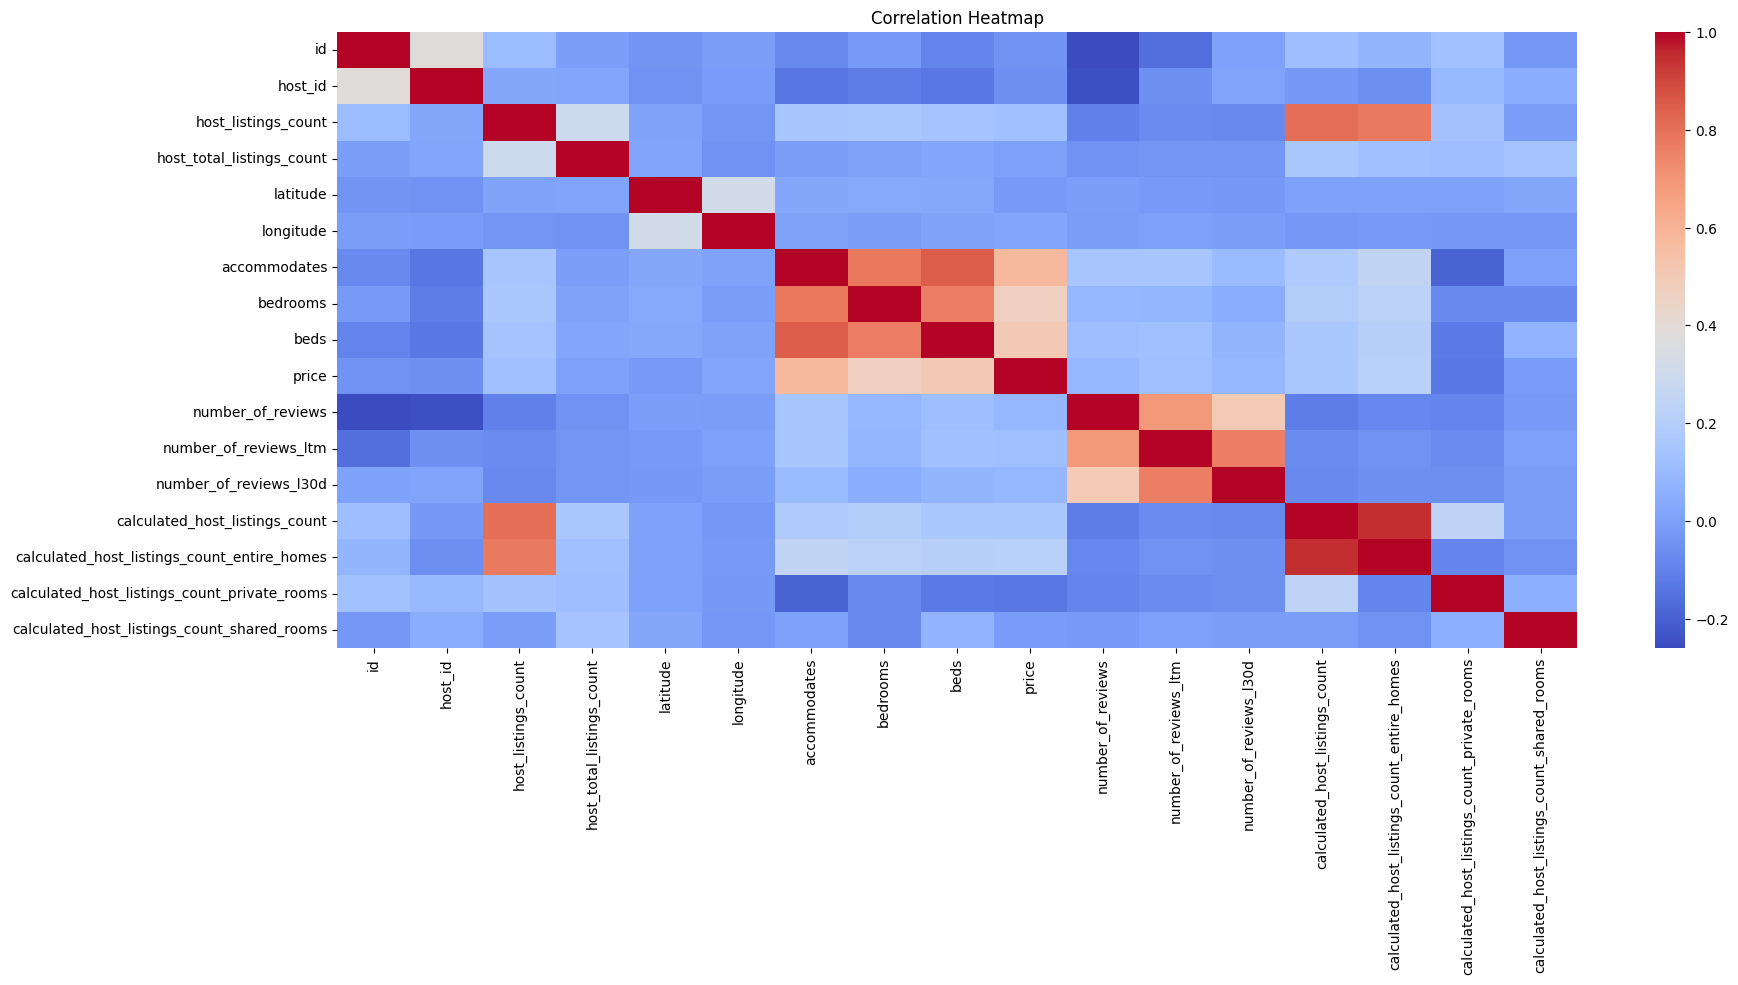

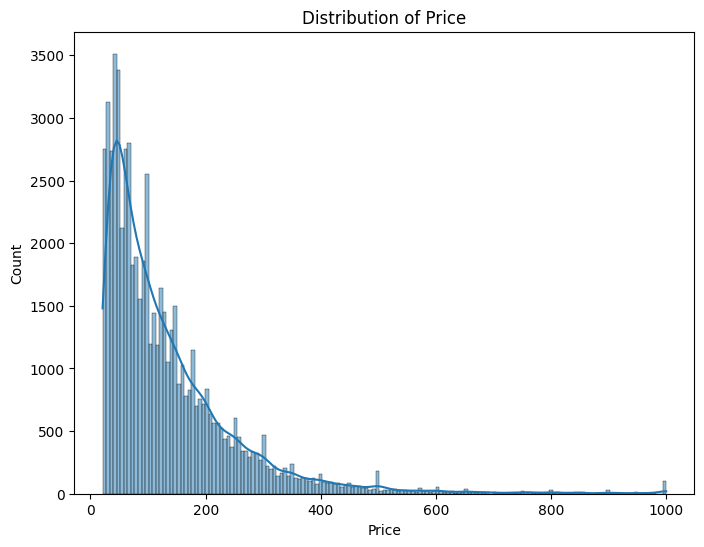

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset

# Correlation analysis
correlation = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable (price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


I will plot the price by neighborhood and will order the neighborhoods by the number of listings from left to right on the nested boxplot, creating a new DataFrame with the counts of listings for each neighborhood and then sort the neighborhoods based on these counts.

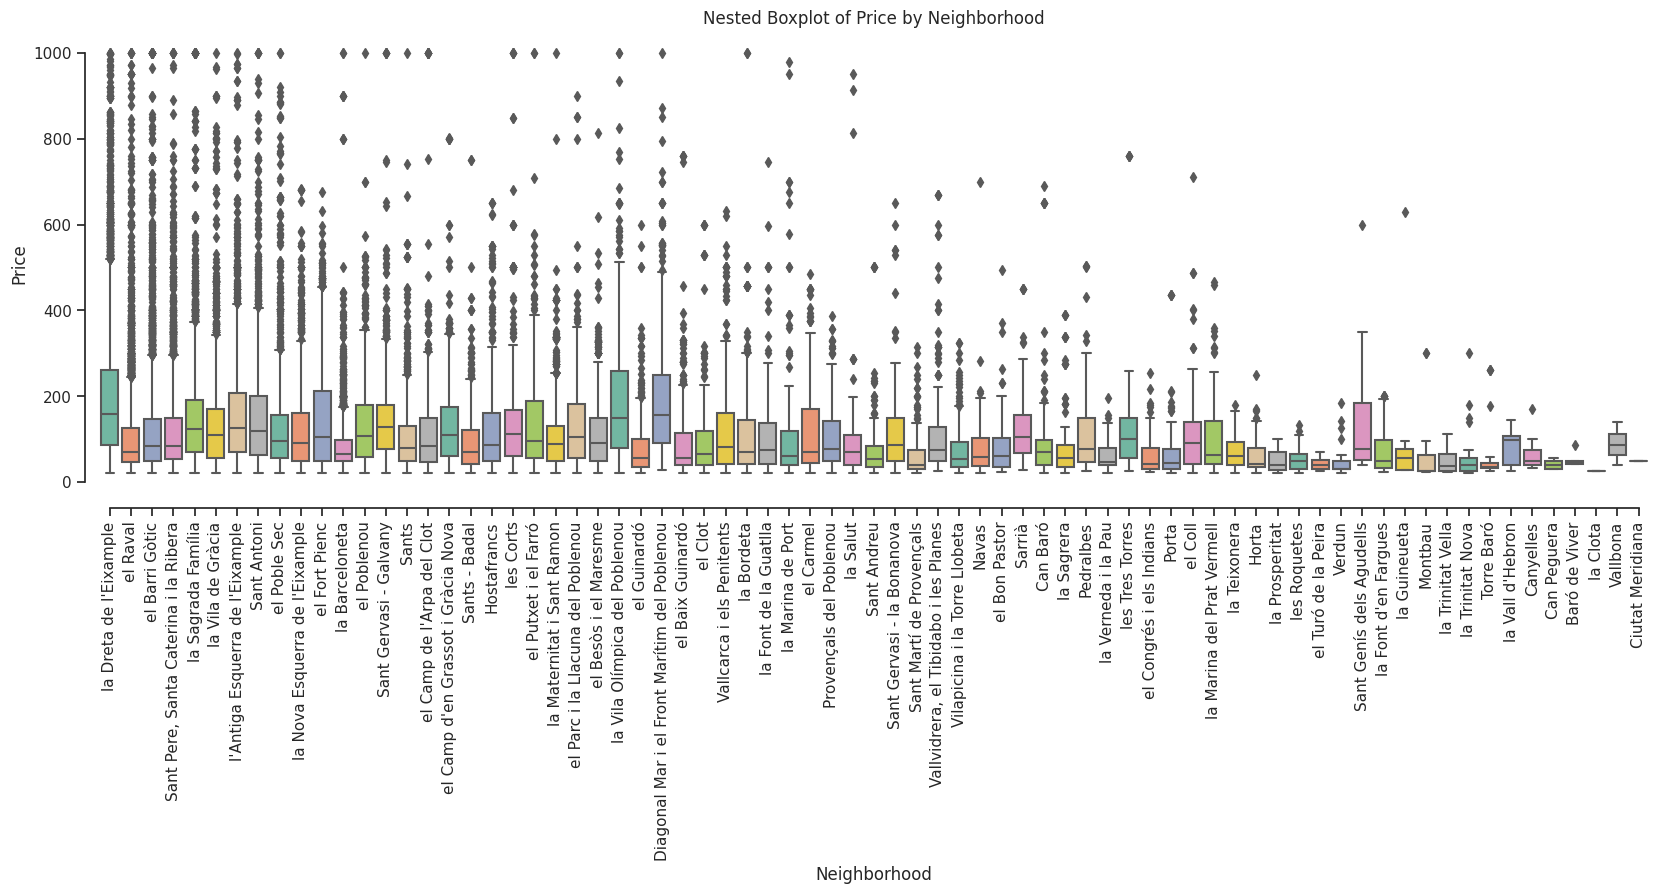

In [ ]:
# Create a DataFrame with the counts of listings for each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood_cleansed', 'count']

# Sort the neighborhoods based on the counts
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=False)

# Set the seaborn theme and palette
sns.set_theme(style="ticks", palette="pastel")

# Adjust figure size
plt.figure(figsize=(20, 6))

# Draw the nested boxplot
sns.boxplot(x='neighbourhood_cleansed', y="price",
            palette="Set2",
            data=df,
            order=neighborhood_counts['neighbourhood_cleansed'])  # Use the sorted order

sns.despine(offset=10, trim=True)

# Adjust plot title and axes labels
plt.title('Nested Boxplot of Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()



In [ ]:
# Get unique neighborhoods
unique_neighborhoods = df['neighbourhood_cleansed'].unique()

# Create a mapping dictionary for neighborhood codes
neighborhood_code_map = {neighborhood: code for code, neighborhood in enumerate(unique_neighborhoods)}

# Add a new column 'neighborhood_code' to the dataframe
df['neighborhood_code'] = df['neighbourhood_cleansed'].map(neighborhood_code_map)
print(df['neighborhood_code'].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


<ipython-input-19-2933a0b2721b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood_code'] = df['neighbourhood_cleansed'].map(neighborhood_code_map)


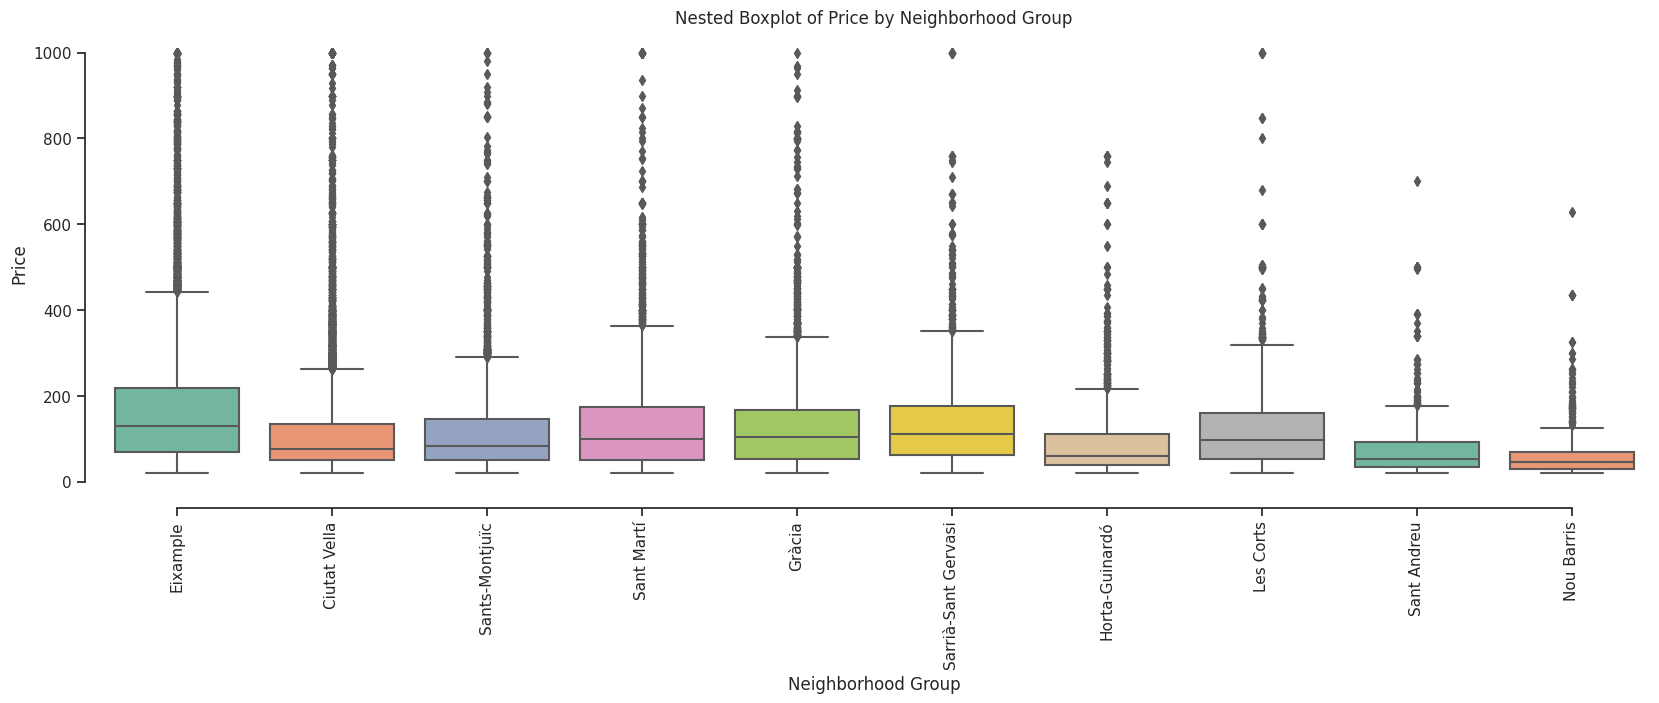

In [ ]:
# Create a DataFrame with the counts of listings for each neighborhood
neighborhood_group_counts = df['neighbourhood_group_cleansed'].value_counts().reset_index()
neighborhood_group_counts.columns = ['neighbourhood_group_cleansed', 'count']

# Sort the neighborhoods based on the counts
neighborhood_group_counts = neighborhood_group_counts.sort_values(by='count', ascending=False)

# Set the seaborn theme and palette
sns.set_theme(style="ticks", palette="pastel")

# Adjust figure size
plt.figure(figsize=(20, 6))

# Draw the nested boxplot
sns.boxplot(x='neighbourhood_group_cleansed', y="price",
            palette="Set2",
            data=df,
            order=neighborhood_group_counts['neighbourhood_group_cleansed'])  # Use the sorted order

sns.despine(offset=10, trim=True)

# Adjust plot title and axes labels
plt.title('Nested Boxplot of Price by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
import folium
from IPython.display import IFrame

# Load the GeoJSON data of Barcelona's neighborhoods
barcelona_geojson_file = '/content/drive/MyDrive/AAA Final Project DS/Data/neighbourhoods.geojson'
barcelona_neighborhoods = pd.read_json(barcelona_geojson_file)

# Create a map centered around Barcelona
barcelona_map = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Plot Airbnb prices on the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Neighborhood: {row['neighbourhood_cleansed']}<br>Price: {row['price']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(barcelona_map)

# Save the map to an HTML file
map_file = 'barcelona_airbnb_prices_map.html'
barcelona_map.save(map_file)

# Read the HTML content of the saved map file
with open(map_file, 'r') as file:
    map_html = file.read()

# Display the map in the notebook using IFrame with a specific port number (e.g., 9000)
IFrame(srcdoc=map_html, width='100%', height='500px')




TypeError: ignored